## Imports


In [48]:
from sklearn.pipeline import Pipeline
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB, ComplementNB
from sklearn.linear_model import LogisticRegression, RidgeClassifier, SGDClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC, LinearSVC
from sklearn.neighbors import KNeighborsClassifier, NearestCentroid
from sklearn.metrics import classification_report, ConfusionMatrixDisplay, accuracy_score
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import time
import numpy as np
import os
import kagglehub

## Load Dataset


In [33]:
theforcecoder_wind_power_forecasting_path = kagglehub.dataset_download('leandrodoze/tweets-from-mgbr')

In [34]:
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/tweets-from-mgbr/Tweets_Mg.csv


In [35]:
file_path = '/kaggle/input/tweets-from-mgbr/Tweets_Mg.csv'

df = pd.read_csv(file_path)
print("\nDataFrame loaded successfully!")
print("First 5 rows of DataFrame:")
print(df.head())
print("\nDataFrame information:")
df.info()



DataFrame carregado com sucesso!
Primeiras 5 linhas do DataFrame:
   Unnamed: 0                      Created At  \
0           0  Sun Jan 08 01:22:05 +0000 2017   
1           1  Sun Jan 08 01:49:01 +0000 2017   
2           2  Sun Jan 08 01:01:46 +0000 2017   
3           3  Wed Jan 04 21:43:51 +0000 2017   
4           4  Mon Jan 09 15:08:21 +0000 2017   

                                                Text  \
0  ���⛪ @ Catedral de Santo Antônio - Governador ...   
1  � @ Governador Valadares, Minas Gerais https:/...   
2  �� @ Governador Valadares, Minas Gerais https:...   
3                        ��� https://t.co/BnDsO34qK0   
4  ��� PSOL vai questionar aumento de vereadores ...   

   Geo Coordinates.latitude  Geo Coordinates.longitude User Location  \
0                       NaN                        NaN        Brasil   
1                  -41.9333                     -18.85           NaN   
2                  -41.9333                     -18.85           NaN   
3            

In [36]:
import nltk
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_pt = stopwords.words('portuguese')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


## Data dados




In [37]:
df = df[['Text', 'Classificacao']].dropna()
df.columns = ['tweet', 'label']
print(df.head())
print(df['label'].value_counts())

                                               tweet     label
0  ���⛪ @ Catedral de Santo Antônio - Governador ...    Neutro
1  � @ Governador Valadares, Minas Gerais https:/...    Neutro
2  �� @ Governador Valadares, Minas Gerais https:...    Neutro
3                        ��� https://t.co/BnDsO34qK0    Neutro
4  ��� PSOL vai questionar aumento de vereadores ...  Negativo
label
Positivo    3300
Neutro      2453
Negativo    2446
Name: count, dtype: int64


In [38]:
X = df['tweet']
y = df['label']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Modelos e Avaliação

In [39]:
classifier_models = {
    "Naive Bayes": MultinomialNB(),
    "Logistic Regression": LogisticRegression(max_iter=1000),
    "Random Forest": RandomForestClassifier(),
    "SVM": SVC(),
    "Ridge Classifier": RidgeClassifier(solver='sparse_cg'),
    "kNN": KNeighborsClassifier(n_neighbors=100),
    "Linear SVC": LinearSVC(C=0.1, dual=False, max_iter=1000),
    "log-loss SGD": SGDClassifier(loss='log_loss', early_stopping=True, n_iter_no_change=3, random_state=42),
    "NearestCentroid": NearestCentroid(),
    "Complement Naive Bayes": ComplementNB(alpha=0.1)
}


 === Naive Bayes ===
              precision    recall  f1-score   support

    Negativo       0.96      0.97      0.97       476
      Neutro       0.96      0.90      0.93       503
    Positivo       0.94      0.98      0.96       661

    accuracy                           0.95      1640
   macro avg       0.95      0.95      0.95      1640
weighted avg       0.95      0.95      0.95      1640



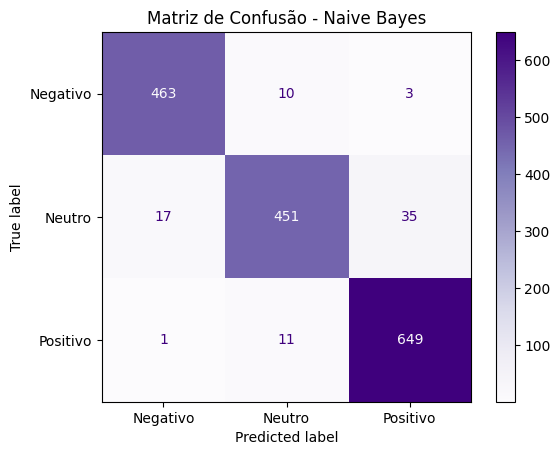


 === Logistic Regression ===
              precision    recall  f1-score   support

    Negativo       0.98      0.96      0.97       476
      Neutro       0.92      0.96      0.94       503
    Positivo       0.98      0.97      0.97       661

    accuracy                           0.96      1640
   macro avg       0.96      0.96      0.96      1640
weighted avg       0.96      0.96      0.96      1640



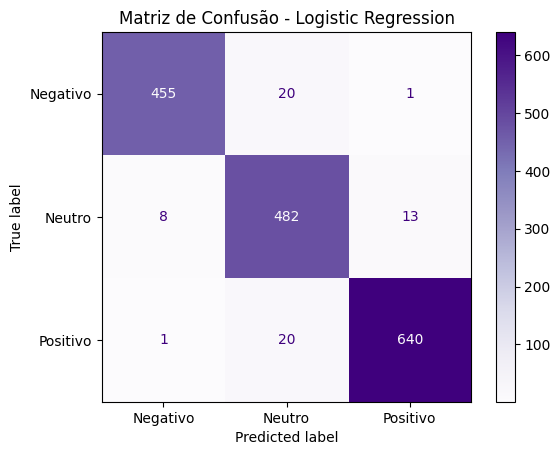


 === Random Forest ===
              precision    recall  f1-score   support

    Negativo       0.96      0.97      0.97       476
      Neutro       0.93      0.95      0.94       503
    Positivo       0.98      0.96      0.97       661

    accuracy                           0.96      1640
   macro avg       0.96      0.96      0.96      1640
weighted avg       0.96      0.96      0.96      1640



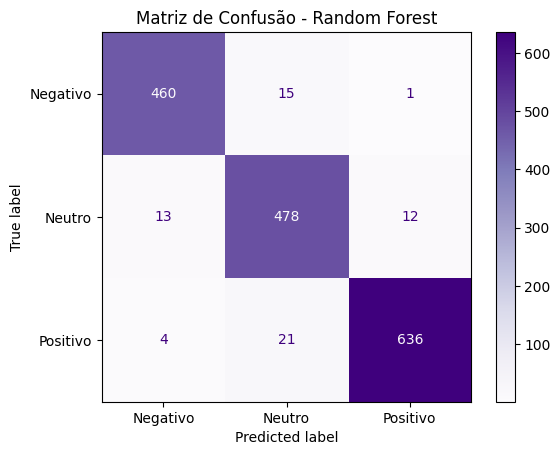


 === SVM ===
              precision    recall  f1-score   support

    Negativo       0.98      0.97      0.97       476
      Neutro       0.93      0.97      0.95       503
    Positivo       0.98      0.97      0.98       661

    accuracy                           0.97      1640
   macro avg       0.97      0.97      0.97      1640
weighted avg       0.97      0.97      0.97      1640



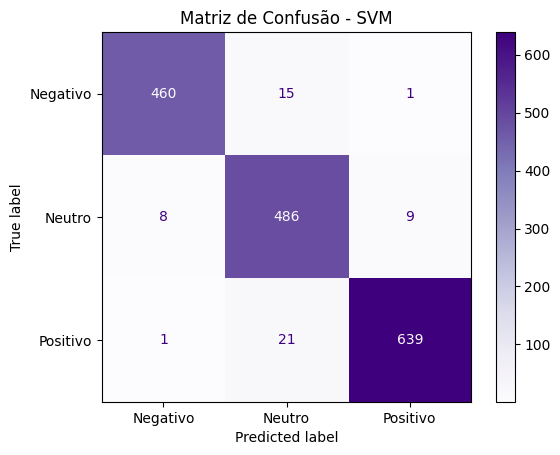


 === Ridge Classifier ===
              precision    recall  f1-score   support

    Negativo       0.97      0.97      0.97       476
      Neutro       0.95      0.95      0.95       503
    Positivo       0.98      0.97      0.97       661

    accuracy                           0.97      1640
   macro avg       0.97      0.97      0.97      1640
weighted avg       0.97      0.97      0.97      1640



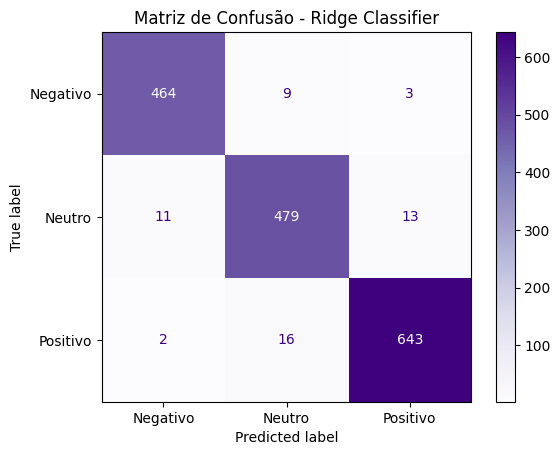


 === kNN ===
              precision    recall  f1-score   support

    Negativo       0.78      0.95      0.85       476
      Neutro       0.89      0.68      0.77       503
    Positivo       0.89      0.90      0.89       661

    accuracy                           0.85      1640
   macro avg       0.85      0.84      0.84      1640
weighted avg       0.86      0.85      0.85      1640



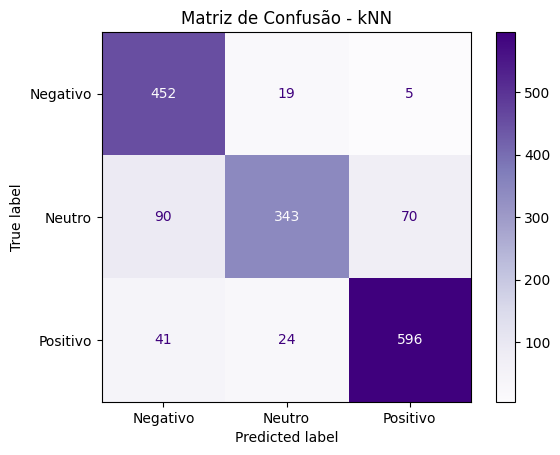


 === Linear SVC ===
              precision    recall  f1-score   support

    Negativo       0.98      0.95      0.97       476
      Neutro       0.92      0.96      0.94       503
    Positivo       0.98      0.97      0.97       661

    accuracy                           0.96      1640
   macro avg       0.96      0.96      0.96      1640
weighted avg       0.96      0.96      0.96      1640



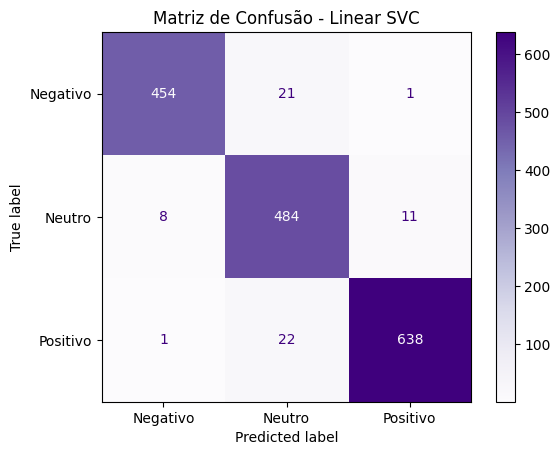


 === log-loss SGD ===
              precision    recall  f1-score   support

    Negativo       0.98      0.95      0.97       476
      Neutro       0.92      0.96      0.94       503
    Positivo       0.98      0.97      0.97       661

    accuracy                           0.96      1640
   macro avg       0.96      0.96      0.96      1640
weighted avg       0.96      0.96      0.96      1640



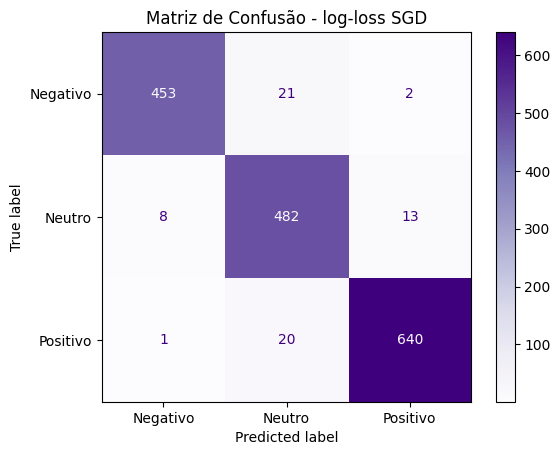


 === NearestCentroid ===
              precision    recall  f1-score   support

    Negativo       0.99      0.73      0.84       476
      Neutro       0.70      0.95      0.81       503
    Positivo       0.96      0.89      0.92       661

    accuracy                           0.86      1640
   macro avg       0.89      0.86      0.86      1640
weighted avg       0.89      0.86      0.86      1640



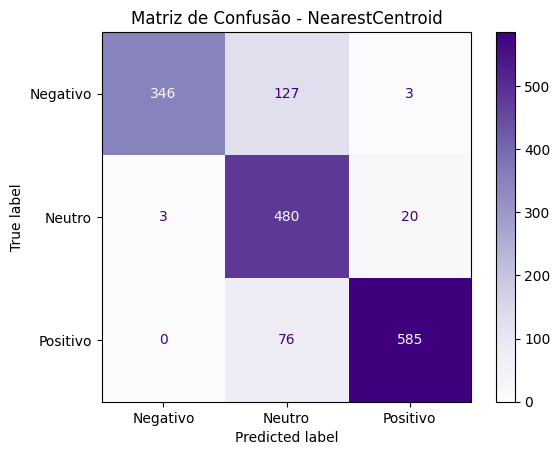


 === Complement Naive Bayes ===
              precision    recall  f1-score   support

    Negativo       0.97      0.98      0.97       476
      Neutro       0.95      0.92      0.94       503
    Positivo       0.96      0.97      0.96       661

    accuracy                           0.96      1640
   macro avg       0.96      0.96      0.96      1640
weighted avg       0.96      0.96      0.96      1640



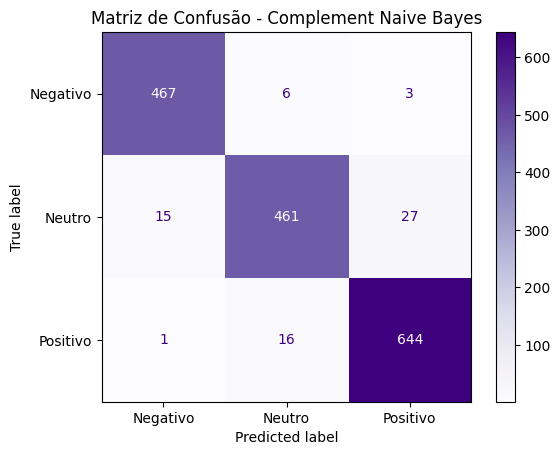

In [49]:
# Lista para armazenar os resultados para o gráfico de trade-off
all_results_for_plot = []

# Avaliação
for name, model in models.items():
    pipe = Pipeline([
        ('tfidf', TfidfVectorizer(stop_words=stopwords_pt)),
        ('clf', model)
    ])

    # Medir tempo de treinamento
    t0 = time.perf_counter()
    pipe.fit(X_train, y_train)
    train_time = time.perf_counter() - t0

    # Medir tempo de teste
    t0 = time.perf_counter()
    y_pred = pipe.predict(X_test)
    test_time = time.perf_counter() - t0

    # Calcular acurácia
    accuracy = accuracy_score(y_test, y_pred)

    # Armazenar resultados para o gráfico de trade-off
    all_results_for_plot.append([name, accuracy, train_time, test_time])

    print(f"\n === {name} ===")
    print(classification_report(y_test, y_pred))
    ConfusionMatrixDisplay.from_estimator(pipe, X_test, y_test, cmap='Purples')
    plt.title(f"Matriz de Confusão - {name}")
    plt.show()

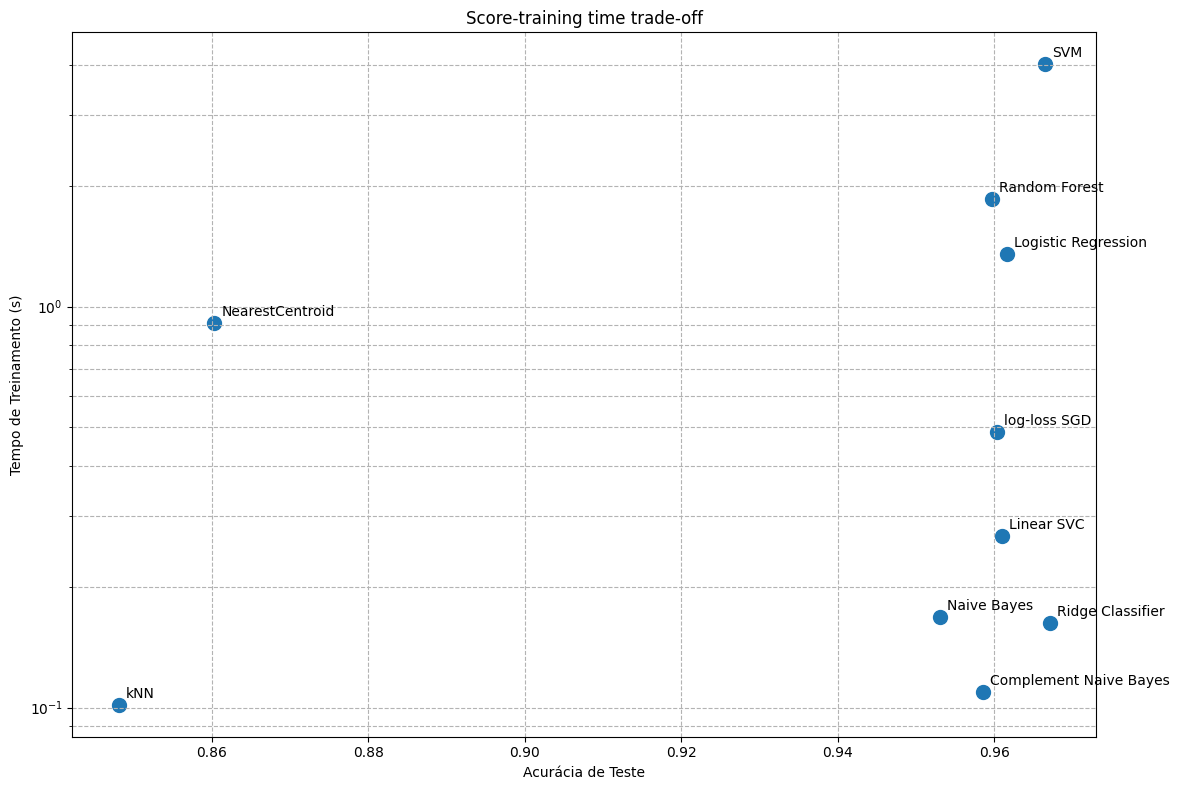

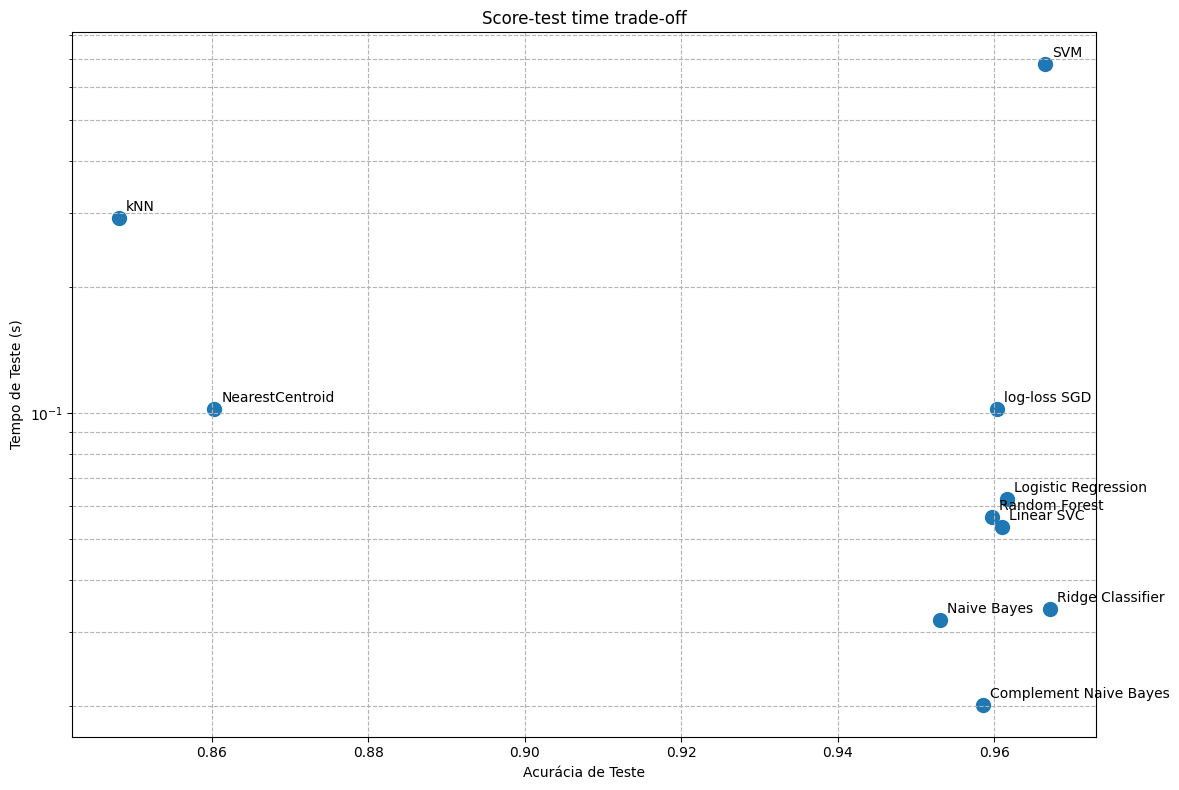

In [51]:
clf_names, scores, training_times, test_times = zip(*all_results_for_plot)

# Converter para arrays numpy para facilitar o uso
scores = np.array(scores)
training_times = np.array(training_times)
test_times = np.array(test_times)

# Gráfico: Acurácia vs. Tempo de Treinamento
fig, ax1 = plt.subplots(figsize=(12, 8))
ax1.scatter(scores, training_times, s=100)
ax1.set(
    title="Score-training time trade-off",
    yscale="log", # Eixo Y em escala logarítmica
    xlabel="Acurácia de Teste",
    ylabel="Tempo de Treinamento (s)",
)

for i, txt in enumerate(clf_names):
    ax1.annotate(txt, (scores[i], training_times[i]), textcoords="offset points", xytext=(5,5), ha='left')

plt.grid(True, which="both", ls="--", c='0.7') # Adiciona grade para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()

# Gráfico: Acurácia vs. Tempo de Teste
fig, ax2 = plt.subplots(figsize=(12, 8))
ax2.scatter(scores, test_times, s=100)
ax2.set(
    title="Score-test time trade-off",
    yscale="log", # Eixo Y em escala logarítmica
    xlabel="Acurácia de Teste",
    ylabel="Tempo de Teste (s)",
)

# Adicionar rótulos para cada ponto
for i, txt in enumerate(clf_names):
    ax2.annotate(txt, (scores[i], test_times[i]), textcoords="offset points", xytext=(5,5), ha='left')

plt.grid(True, which="both", ls="--", c='0.7') # Adiciona grade para melhor leitura
plt.tight_layout() # Ajusta o layout para evitar sobreposição
plt.show()